<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 1
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  1 Aban
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

<h1> Personal Info </h1>
<br>
<font size=3>
    
student_number =  99101105

    
Name = Abolfazl

Last_Name = Eshagh
    </font>

<h1> Rules</h1>
<br>
<font size=3>
- This assignment is due Aban 1th at 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Aban 11th at 23:59:59.
    </font>

<h1> Requirements </h1>
    <br>
    <font size=3>
Assignment's required and recommended libraries are imported here.
    </font>

In [89]:
!pip install tqdm
!pip install -- upgrade matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import pandas as pd
from collections import namedtuple

<h1> Convexity Check </h1>
    <br>
    
<font size=3>
Some functions are given here which are needed to be classified as convex or non-convex. You need to implement them and check their convexity. Any brute force method is acceptable as long as you specify whether or not these are convex and in case of being non-convex what their exception interval and middle point are according to convexity check formula:
</font>    

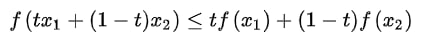

<font size=3>
Here, $tx_1 + (1-t)x_2$ is the exception middle point where given $t$ conteradicts previous inequality and your exception interval is $(x_1,x_2)$
    
At last, you need to visualize these functions in $R^2$ (for all functions) as well as their exception intervall [line] and exception middle point (if non-convex).

To select the general considered domain of these functions every applicable domain is acceptable for non-convex ones, and in case of convex ones, domain has to be large enough to show the overal trend of the function.  
    
</font>

<font size=3>

a)
$f_1(x) = e^{(|x^{10}-x^8|)}$
<br/>
b)
$f_2(x) = e^{x^2 + 2x + \frac{1}{x}} \quad for \quad x \in (0, \infty)$
<br/>
c)
$f_3(x) = -\log{|2 cos(x) + \frac{100}{x}|} $
    
</font>

In [2]:
def f1(x):
    # implementation of f1 according to previous formula
#     pass
    return np.exp(abs(x**10-x**8))

def f2(x):
    # implementation of f2 according to previous formula
    return np.exp(x**2 + 2*x + 1/x)
#     pass

def f3(x):
    # implementation of f3 according to previous formula
    return -np.log(abs(2*np.cos(x)+100/x))
#     pass

In [3]:
ConvexityResult = namedtuple("ConvexityResult", ["is_convex", "exc_interval", "exc_mid_pt"])

def check_convexity(func):
    # Check the input function for convexity
    
    res = ConvexityResult(is_convex, (exc_start_pt, exc_end_pt), exc_mid_pt)
    # if is_convex == False then exc values are None
    return res

In [4]:
def visualize(func, convexity_res):
    # visualize the input function
    # if non convex show exception interval
    x = np.linspace(-10, 10, 100)
    y = func(x)
    plt.plot(x, y)
    plt.title('Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    if convexity_res == False:
        print("Function is not convex")
        print("Exception interval: ", x[np.argmin(y)], x[np.argmax(y)])
    else:
        print("Function is convex")

<h1> Continuous Optimization</h1>
 
<br> 
<font size=3> 
Here, you need to implement the Gradient Descent (GD) method to minimize the given function. This function ( $f(x,y)$ ) consists of multiple modals which causes some local minimas. Then, you need to examine two types of augmentation on GD. First, a mechanism similar to Simulated Anealing (SA) which we will recall as learning rate decay and second, adding momentum to update equation of GD.
    <br>
    Provide visualization and an explanation for the behaviour of all GD variations: GD, GD+lr_decay, and GD+momentum.
    </font>

In [5]:
def g(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f(x, y):
    return -g(2*x,2*y) + \
        0.05*g(2*x + 0.5, 2*y + 0.5) - 0.1*g(x + 1, y + 1) + \
        0.05*g(2*x + 0.5, 2*y - 0.5) - 0.1*g(x + 1, y - 1) + \
        0.05*g(2*x - 0.5, 2*y + 0.5) - 0.1*g(x - 1, y + 1) + \
        0.05*g(2*x - 0.5, 2*y - 0.5) - 0.1*g(x - 1, y - 1)

<font size=3>
    The following figure shows how this function would look like in $R^3$ space:

</font>

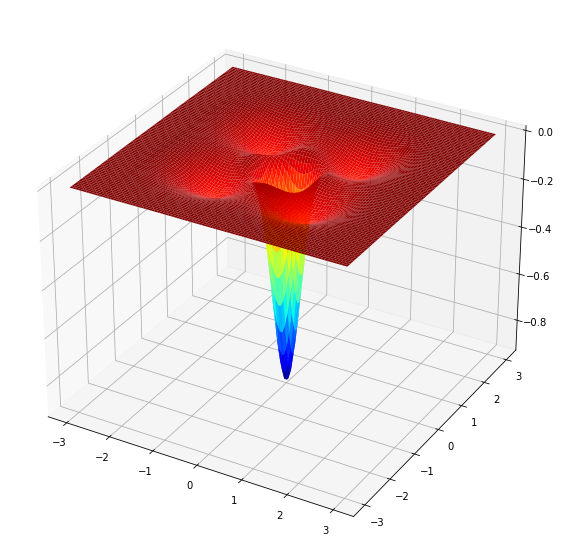

In [6]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
plt.show()

<font size=3>
    All these 3 scenarios need a gradient function which is to be implemented using <u><b>numeric</b></u> methods:
</font>

In [7]:
def grad(func, x, y, eps=1e-8):
    # Calculate gradient for the input function using numeric methods
    # subjected to input values: x, y
    return (x_grad, y_grad)

<font size=3>
    You also need to visualize the updating path from the start point to the convergence. Addressing multiple experiments for each scenario (i.e. multiple initial points), you can just visualize one experiment with the result closest to average of all resutls (of that scenario) or just visualize any experiment that suits best to the explanation you're going to provide for this scenario.
    <br><br>
    An example is provided here:
</font>

In [8]:
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [9]:
def path_visualize(pts):
    global X, Y, Z
    # pts: [N, 2]
    # visualizes input array of points constructing convergence path
    plt.figure(figsize=(10, 10))
    plt.contour(X, Y, np.exp(Z)**10, cmap='Spectral')
    a_x, a_y = np.array(pts).T
    plt.plot(a_x, a_y, color='red');

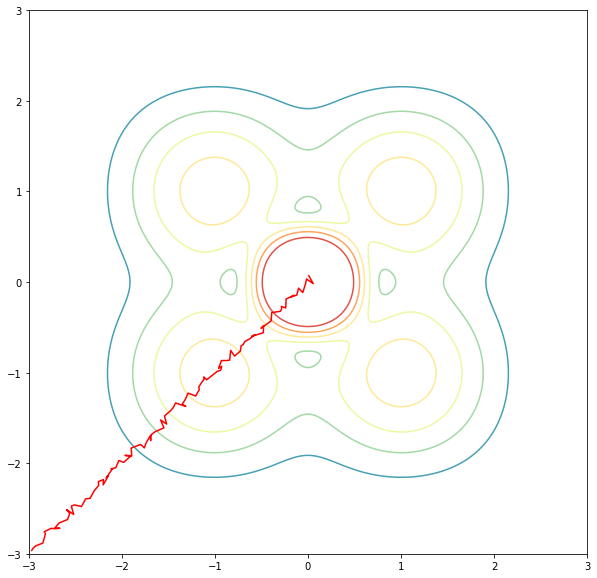

In [88]:
# An example to show how path_visualize looks like
pts = np.array([np.linspace(-3, 0, 100), np.linspace(-3, 0, 100)]).T
pts += np.random.rand(pts.shape[0], 2)/10

path_visualize(ls)

### Vanila GD

<font size=3>
    The first scenario is the simple, original Gradient Descent. You need to analyze and explain the effect of different constant learning rates ( [0.001, 0.01, 0.1, 1, 10] ). Run optimization steps for 10000 iterations and from 5 different random initial points.
</font>

In [11]:
def GD(func, init_x, init_y, lr, max_iter):
    # Perform gradient descent update iterations
    x = init_x
    y = init_y
    x_history = [x]
    y_history = [y]
    for i in range(max_iter):
        x = x - lr * 2 * x
        y = y - lr * 2 * y
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history

def minimize(func, lr, max_iter=10000):
    # minimize the given function and visaulize the results
    # initialize the random points
    x = np.random.uniform(-10, 10)
    y = np.random.uniform(-10, 10)
    x_history, y_history = GD(func, x, y, lr, max_iter)
    # visualize the results
    plt.plot(x_history, y_history, 'o-', ms=3, lw=1.5, color='black')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.show()
    return x_history, y_history

### LR decay GD

<font size=3>
   Now we want to better GD's performance by augmenting the learning rate (lr) and adding a decay effect through iterations.  
 <br>  <br> 
You need to implement a mechanism similar to Simulated Anealing (SA) to modify learning rate (lr) during runtime. The initial value for lr can be 0.5 and how you change it should be according to the SA lecture. Again, random initial points, analysis and visualization are required.
    <br><br>
</font>

In [12]:
def GD_variable_lr(func, init_x, init_y, lr_init, max_iter):
    # perform GD with learning rate varying by temprature
    x = init_x
    y = init_y
    x_history = [x]
    y_history = [y]
    lr = lr_init
    for i in range(max_iter):
        x = x - lr * 2 * x
        y = y - lr * 2 * y
        x_history.append(x)
        y_history.append(y)
        lr = lr * 0.99
    return x_history, y_history


def minimze_variable_lr(func, lr_init, max_iter=10000):
    # minimze the given function and visaulize the results
    # initialize the random points
    x = np.random.uniform(-10, 10)
    y = np.random.uniform(-10, 10)
    x_history, y_history = GD_variable_lr(func, x, y, lr_init, max_iter)
    # visualize the results
    plt.plot(x_history, y_history, 'o-', ms=3, lw=1.5, color='black')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.show()
    return x_history, y_history

### GD with momentum

<font size=3>
    Momentum is a mechanism which accelerates gradient vectors in the right direction and helps with faster convergence when it comes to the stochastic GD. Briefly saying a simple change in GD update equation will do the work. What happens is that we store the previous state of our updating parameter(s) and use it to simulate a momentum for updating path. The detailed explanation can be find <a href='https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d'>here</a>. 
   This technique is widely used for Stochastic GD. Here, we want to examine it on a double parameter scenario. The update equation is here:
    <br><br>
</font>
<font size=4>
     $$ X_t = X_t - \gamma(\beta X_{t-1} + (1-\beta)\nabla_Xf(X))$$
    </font>
    <br>
<font size=3>
   After performing the experiments, provide your analysis and visualization (path_visualize). 
    <br><br>
</font>

In [ ]:
def GD_momentum(func, init_x, init_y, lr, max_iter):
    # add momentum to GD update equation
    pass

def minimze_momentum(func, lr, max_iter=10000):
    # minimze the given function and visaulize the results
    pass